In [83]:
import pandas as pd
import datetime as dt
import glob,re

In [84]:
climo_path = glob.glob('csv/climo*')[0]
climo_csv_df = pd.read_csv(climo_path,names = ["No.","V(m/s)","T(C)","H(%RH)","A(hPa)","Atom.F"])

#info
climo_info_df = climo_csv_df[:13]
climo_info_df =  climo_info_df.rename(columns={'No.': 'info','V(m/s)':'data'})
climo_info_df = climo_info_df.drop(["T(C)","H(%RH)","A(hPa)","Atom.F"],axis=1)
climo_info_dict = dict(zip(climo_info_df['info'], climo_info_df['data']))

In [85]:
def climo_momenttime(x :int):
    beginning_time_str = climo_info_dict['[Measurement beginning time]']
    beginning_time_str = beginning_time_str.replace('#','')
    beginning_time_list = re.split('[/: ]',beginning_time_str)
    beginning_year = int(beginning_time_list[0])
    beginning_month = int(beginning_time_list[1])
    beginning_day = int(beginning_time_list[2])
    beginning_hour = int(beginning_time_list[3])
    beginning_minite = int(beginning_time_list[4])
    beginning_second = int(beginning_time_list[5])
    beginning_time = dt.datetime(beginning_year,beginning_month,beginning_day,beginning_hour,beginning_minite,beginning_second)
    elapsed_time = x * int(climo_info_dict['[S-TIME(S) -- Sampling interval(s)]'])
    moment_time = beginning_time + dt.timedelta(seconds = elapsed_time)
    return moment_time

In [86]:
climo_df = climo_csv_df[19:]
climo_df =  climo_df.rename(columns={'No.': 'Time'})
climo_df = climo_df.drop(["A(hPa)","Atom.F"],axis=1)
climo_df = climo_df.astype({'Time':int, 'V(m/s)':float, "T(C)":float ,"H(%RH)":float})
climo_df['Time'] = climo_df['Time'].map(climo_momenttime)
climo_df = climo_df.set_index('Time')

In [87]:
gauss_path = glob.glob('csv/gauss*')[0]
gauss_df = pd.read_csv(gauss_path, encoding = 'shift-jis')
gauss_df['Time'] = gauss_df['年月日'].str.cat(gauss_df['時刻'], sep = ' ')
gauss_df = gauss_df.drop(columns = {'年月日','時刻'})
gauss_df = gauss_df.rename(columns = {'データ01(mG)':'φ(mG)'})

In [88]:
def gauss_momenttime(time:str):
    moment_time_list = re.split('[/: ]',time)
    year = int(moment_time_list[0])
    month = int(moment_time_list[1])
    day = int(moment_time_list[2])
    hour = int(moment_time_list[3])
    minute = int(moment_time_list[4])
    second = int(moment_time_list[5])
    moment_time = dt.datetime(year,month,day,hour,minute,second)
    return moment_time

In [89]:
gauss_df['Time'] = gauss_df['Time'].map(gauss_momenttime)
gauss_df = gauss_df.set_index('Time')

,V(m/s),T(C),H(%RH),φ(mG)
Time,,,,
2022-12-01 13:06:32,0.00,23.0,29.9,454.0
2022-12-01 13:06:33,0.00,23.0,29.8,454.0
2022-12-01 13:06:34,0.00,23.0,29.8,455.0
2022-12-01 13:06:35,0.00,23.0,29.8,451.0
2022-12-01 13:06:36,0.00,23.0,29.8,451.0
...,...,...,...,...
2022-12-01 13:56:53,0.14,23.0,31.7,1409.0
2022-12-01 13:56:54,0.14,23.0,31.8,1406.0
2022-12-01 13:56:55,0.16,23.0,31.7,1408.0


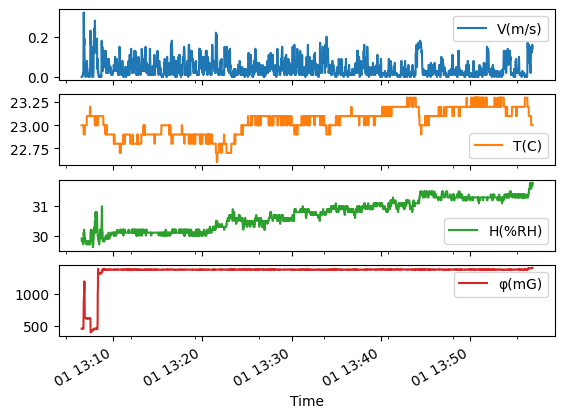

In [99]:
merged_df = pd.merge(climo_df,gauss_df,left_index=True,right_index = True)
merged_df = merged_df.dropna()
merged_df.plot(subplots = True)
merged_df